In [7]:
Train_Path = "/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Train"
Val_Path = "/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val"
path = "/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/"

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from fastai.vision import *
import tensorflow as tf
import os

In [9]:
#CNN based model in Keras
model = tf.keras.models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
#Training from Scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    '/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
validation_generator = test_dataset.flow_from_directory(
    '/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 60 images belonging to 2 classes.


In [14]:
hist = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs = 15, 
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/15
6/6 [==============================] - 17s 3s/step - loss: 1.1480 - accuracy: 0.4792 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/15
6/6 [==============================] - 15s 2s/step - loss: 0.6255 - accuracy: 0.6458 - val_loss: 0.6202 - val_accuracy: 0.6833
Epoch 3/15
6/6 [==============================] - 17s 3s/step - loss: 0.5411 - accuracy: 0.7344 - val_loss: 0.4770 - val_accuracy: 0.9333
Epoch 4/15
6/6 [==============================] - 17s 3s/step - loss: 0.3259 - accuracy: 0.8646 - val_loss: 0.1954 - val_accuracy: 0.9500
Epoch 5/15
6/6 [==============================] - 16s 3s/step - loss: 0.3427 - accuracy: 0.8594 - val_loss: 0.3183 - val_accuracy: 0.9833
Epoch 6/15
6/6 [==============================] - 16s 3s/step - loss: 0.2132 - accuracy: 0.9062 - val_loss: 0.1448 - val_accuracy: 0.9667
Epoch 7/15
6/6 [==============================] - 15s 2s/step - loss: 0.1583 - accuracy: 0.9375 - val_loss: 0.1062 - val_accuracy: 0.9667
Epoch 8/15
6/6 [==================

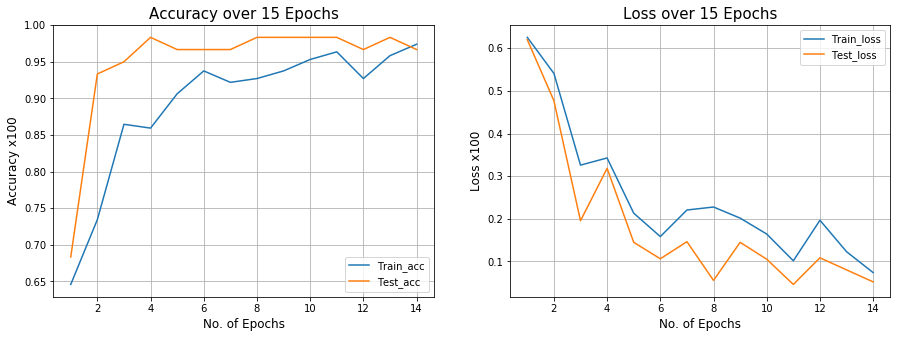

In [38]:
def plot_acc_loss(hist, epochs):
 acc = hist.history['accuracy']
 loss = hist.history['loss']
 val_acc = hist.history['val_accuracy']
 val_loss = hist.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.xlabel('No. of Epochs', fontsize=12)
 plt.ylabel("Accuracy x100", fontsize=12)
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.xlabel('No. of Epochs', fontsize=12)
 plt.ylabel("Loss x100", fontsize=12)
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(hist, 15)

In [43]:
model.save("model_adv.hdf5")

NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.

In [22]:
model.evaluate_generator(train_generator)

[0.056937821209430695, 0.9776785969734192]

In [23]:
model.evaluate_generator(validation_generator)

[0.05201507732272148, 0.9666666388511658]

In [44]:
model.load_weights('/Users/rakshitbatra/Desktop/Covid-19_Detection/my_model_weights.hdf5')

OSError: Unable to open file (unable to open file: name = '/Users/rakshitbatra/Desktop/Covid-19_Detection/my_model_weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [45]:
import os

In [46]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [47]:
y_actual = []
y_test = []

In [28]:
for i in os.listdir("/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Normal"):
    img = image.load_img("/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

/Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
for i in os.listdir("/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Covid"):
    img = image.load_img("/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [30]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_actual, y_test)

In [33]:
import seaborn as sns

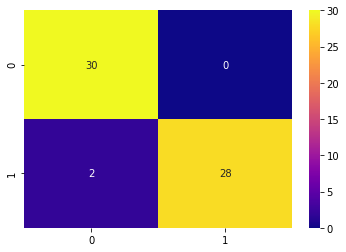

In [34]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [41]:

import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/covid19.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(training_datagen.class_indices)

ValueError: in user code:

    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1579 predict_function  *
        return step_function(self, iterator)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1569 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2844 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3627 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1562 run_step  **
        outputs = model.predict_step(data)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1535 predict_step
        return self(x, training=False)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1057 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:421 call
        inputs, training=training, mask=mask)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1057 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:1447 call
        return getattr(self._module, self._method_name)(*args, **kwargs)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/keras/engine/base_layer.py:1014 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 86528 but received input with shape (None, 4608)
